----

# **Demonstrate Decision Tree Classification Algorithm**

## **Author**   :  **Muhammad Adil Naeem**

## **Contact**   :   **madilnaeem0@gmail.com**
<br>

----

### **Importing Libraries**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

### **Load the Dataset**

In [2]:
df  = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data', header=None, names=['Class Name', 'Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'])

### **First 5 Rows of Dataset**

In [3]:
df.head()

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


### **Information about dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class Name      625 non-null    object
 1   Left-Weight     625 non-null    int64 
 2   Left-Distance   625 non-null    int64 
 3   Right-Weight    625 non-null    int64 
 4   Right-Distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


### **Check for missing Value**

In [5]:
df.isnull().sum()

,0
Class Name,0
Left-Weight,0
Left-Distance,0
Right-Weight,0
Right-Distance,0


### **Statistical Description of Dataset**

In [6]:
df.describe()

,Left-Weight,Left-Distance,Right-Weight,Right-Distance
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


### **Splitting Data into X and y**

In [7]:
X = df.drop('Class Name', axis=1)
y = df['Class Name']

### **Splitting Data into Train and Test**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **Fit Decision Tree Classifier**

In [10]:
tree_classifier = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=3, min_samples_leaf=5)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

### **Make Prediction With Classifier**

In [11]:
y_pred = tree_classifier.predict(X_test)

### **Evaluate the Model**

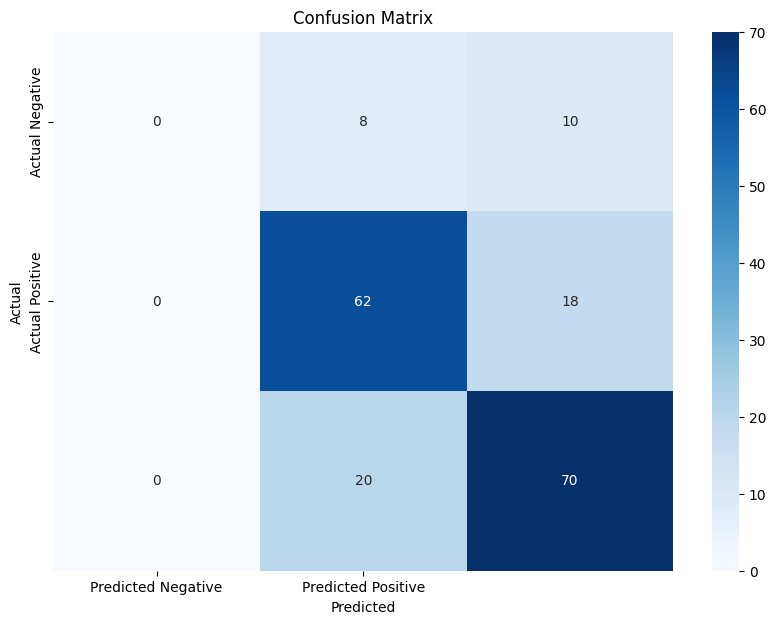

In [12]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [13]:
#  Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        18
           L       0.69      0.78      0.73        80
           R       0.71      0.78      0.74        90

    accuracy                           0.70       188
   macro avg       0.47      0.52      0.49       188
weighted avg       0.64      0.70      0.67       188



### **Plot a Decision Tree**

In [14]:
target = list(df['Class Name'].unique())
feature_names = list(X.columns)

- This code snippet retrieves unique class names from the `Class Name` column of a DataFrame `df` and stores them in a list called `target`. It also creates a list of feature names from the columns of the DataFrame `X`, which typically represents the input features for a machine learning model.

In [16]:
# plot the tree
r = export_text(tree_classifier, feature_names=feature_names, show_weights=True)
print(r)

|--- Left-Weight <= 2.50
|   |--- Right-Distance <= 1.50
|   |   |--- Left-Distance <= 2.50
|   |   |   |--- weights: [2.00, 4.00, 6.00] class: R
|   |   |--- Left-Distance >  2.50
|   |   |   |--- weights: [1.00, 17.00, 2.00] class: L
|   |--- Right-Distance >  1.50
|   |   |--- Right-Weight <= 2.50
|   |   |   |--- weights: [6.00, 17.00, 26.00] class: R
|   |   |--- Right-Weight >  2.50
|   |   |   |--- weights: [3.00, 3.00, 84.00] class: R
|--- Left-Weight >  2.50
|   |--- Left-Distance <= 2.50
|   |   |--- Right-Weight <= 2.50
|   |   |   |--- weights: [4.00, 29.00, 10.00] class: L
|   |   |--- Right-Weight >  2.50
|   |   |   |--- weights: [3.00, 10.00, 48.00] class: R
|   |--- Left-Distance >  2.50
|   |   |--- Right-Distance <= 3.50
|   |   |   |--- weights: [4.00, 93.00, 3.00] class: L
|   |   |--- Right-Distance >  3.50
|   |   |   |--- weights: [8.00, 35.00, 19.00] class: L

